<a href="https://colab.research.google.com/github/brayanb1701/Fisica3_Lab1_MAS/blob/main/Lab1_Data_Treatment_MAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Brayan Rodolfo Barajas Ochoa - 2170688
## Angela Sofía Barajas Ochoa - 2200018

In [67]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import g as g2,pi #cte gravedad
import pandas as pd
from sklearn.metrics import r2_score

## Cálculo de la gravedad en Bucaramanga de acuerdo a la latitud y altitud

In [33]:
lat_bmanga = 7.11392*np.pi/180
g_lat = 9.780327*(1+0.0053024*np.sin(lat_bmanga)**2-0.0000058*np.sin(2*lat_bmanga)**2)
print("Valor de la gravedad de acuerdo a la latitud en Bucaramanga: "+str(g_lat))
alt_bmanga = 1000
g_alt = g_lat*(6.371e6/(6.371e6+alt_bmanga))**2
print("Valor de la gravedad en Bucaramanga (teórico): "+str(g_alt))
g = g_alt

Valor de la gravedad de acuerdo a la latitud en Bucaramanga: 9.781118936943049
Valor de la gravedad en Bucaramanga (teórico): 9.77804914678951


# Primera Parte
## Cte elástica del resorte
Partiendo del equilibrio de fuerzas en el eje vertical, se tiene que mg = kx, donde x es la deformación producida por la masa al sujetarla al resorte en equilibrio; además, se toma como punto 0 donde se encuentra el resorte solamente con el soporte.

In [36]:
datos = pd.read_excel('Datos_lab1_p1.xlsx')
datos

,Masa (g),Elongación (m)
0,5,0.017
1,10,0.032
2,15,0.049
3,20,0.065
4,25,0.083
5,30,0.099
6,35,0.115


In [248]:
m = (datos['Masa (g)'])/1000 #masa en kg
x = datos['Elongación (m)']

In [250]:
def linear_k(x, m, b):
    return m*x+b

params, cov = curve_fit(linear_k, x, m*g)    #Ajuste a la recta
y_linear = linear_k(x, *params)
R2 = r2_score(m*g, y_linear) #El valor de R^2 permite saber qué tan bien se ajusta la recta a los datos obtenidos
print("R^2 para el ajuste lineal: "+str(R2))

R^2 para el ajuste lineal: 0.9996815167297388


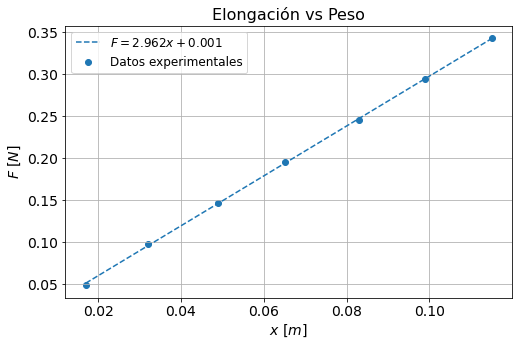

In [251]:
#Tamaño de la figura
plt.figure(figsize=(8, 5)) 

#Se grafica la funcion lineal y los puntos de datos experimentales
plt.plot(x, linear_k(x, *params), linestyle='--', label='$F = %.3fx+%.3f$'%(params[0],params[1]))
plt.scatter(x, m*g, label='Datos experimentales')
plt.legend()

#Definir título y ajustar el tamaño y pocisión de la leyenda y los ejes
plt.title('Elongación vs Peso', fontsize = 16)
plt.legend(fontsize = 12)

plt.ylabel('$F$ [$N$]', fontsize = 14)
plt.xlabel('$x$ [$m$]', fontsize = 14)
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos

In [252]:
# Cte elástica del resorte
k = params[0]
print("El valor de la constante elástica del resorte k es: "+str(k))

El valor de la constante elástica del resorte k es: 2.9621015205500667


In [152]:
cov

array([[ 5.59056204e-04, -3.67379861e-05],
       [-3.67379861e-05,  3.02321626e-06]])

# Segunda Parte
## Análisis datos por cada caso

Para comenzar a realizar el análisis se debe partir de graficar (t vs x) (t vs v) (t vs a) (v vs x) para conocer caracteristeicas como el tipo de movimiento. Luego de eso se realiza una aproximación de las funciones dadas por la teoría en recorrido y velocidad, en consecuencia de estas se obtienen los parámetros de amplitud, cte amortiguamiento y fase. Además luego se halla el periodo el cual depende de la frecuencia fundamental

In [264]:
#Descomprimir los datos del archivo rar
!unrar x datos_laboratorio.rar
!ls datos_laboratorio


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from datos_laboratorio.rar

Creating    datos_laboratorio                                         OK
Extracting  datos_laboratorio/2 cm 10 g.txt                                5%  OK 
Extracting  datos_laboratorio/2 cm 20 g.txt                               11%  OK 
Extracting  datos_laboratorio/2 cm 5 g.txt                                16%  OK 
Extracting  datos_laboratorio/4 cm 10 g.txt                               24%  OK 
Extracting  datos_laboratorio/4 cm 20 g.txt                               32%  OK 
Extracting  datos_laboratorio/4 cm 5 g.txt                                39%  OK 
Extracting  datos_laboratorio/6 cm 10 g.txt                               50%  OK 
Extracting  datos_laboratorio/6 cm 20 g.txt                               58%  OK 
Extracting  datos_laboratorio/6 cm 5 g.txt                                67%

In [204]:
#Funciones para ajustar los datos a un MAS o a un MAA
def f_MAS(t, a, w, phi):
    return a*np.cos((w*t)+phi)
def f_MAA(t, a, w, phi, b):
    return a*np.exp(-b*t)*np.cos((w*t)+phi)

In [283]:
def fits(data,masa,img):
    #Leer cada archivo primero se debe cambiar las comas por puntos
    df = pd.read_csv(data, skiprows=4, sep='\t', decimal=",")
    df = df.dropna()
    df.columns = ['Tiempo', 'Recorrido', 'Fuente', 'Velocidad', 'Aceleracion']
    #Separar cada columna para mejor manejo
    if data=='datos_laboratorio/8 cm 5 g.txt': t = df['Tiempo']/1000
    else: t = df['Tiempo']
    t = t[t<15]
    r = df['Recorrido'][:len(t)]
    v = df['Velocidad'][:len(t)]
    a = df['Aceleracion'][:len(t)]
    #Para el ajuste a un MAS, se selecciona hasta 10 segundos
    t_MAS = t[t<5]
    n = len(t_MAS)
    w_guess = np.sqrt(k/(masa/1000))
    params_MAS, cov_MAS = curve_fit(f_MAS, t_MAS, r[:n], p0=[r.max(),w_guess,0])  
    params_MAA, cov_MAA = curve_fit(f_MAA, t, r)  
    y_MAS = f_MAS(t_MAS,*params_MAS)
    R2_MAS = r2_score(r[:n], y_MAS) #El valor de R^2 permite saber qué tan bien se ajusta la recta a los datos obtenidos
    y_MAA = f_MAA(t,*params_MAA)
    R2_MAA = r2_score(r, y_MAA) #El valor de R^2 permite saber qué tan bien se ajusta la recta a los datos obtenidos
    #Se crean las gráficas de los casos
    fig, axs = plt.subplots(2, 2,figsize=(12,10),constrained_layout=True)
    axs[0, 0].plot(t_MAS, f_MAS(t_MAS,*params_MAS),color='black',linestyle='--', label='MAS; $R^2=$'+str(round(R2_MAS,3)))
    axs[0, 0].plot(t, f_MAA(t,*params_MAA),color='orange',linestyle='--', label='MAA; $R^2=$'+str(round(R2_MAA,3)))
    axs[0, 0].plot(t, r, color='r', label='Datos exp')
    axs[0, 0].set(xlabel='Tiempo [s]', ylabel='Posición [m]')
    axs[0, 0].set_title('Posición vs Tiempo')
    axs[0, 0].legend()
    axs[0, 1].plot(t, v, color='b', label='Datos exp')
    axs[0, 1].set(xlabel='Tiempo [s]', ylabel='Velocidad [m/s]')
    axs[0, 1].set_title('Velocidad vs Tiempo')
    axs[1, 0].plot(t, a, color='g', label='Datos exp')
    axs[1, 0].set(xlabel='Tiempo [s]', ylabel='Aceleración [$m/s^2$]')
    axs[1, 0].set_title('Aceleración vs Tiempo')
    axs[1, 1].plot(v, r, color='#F9D923', label='Datos exp')
    axs[1, 1].set(xlabel='Posición [m]', ylabel='Velocidad [m/s]')
    axs[1, 1].set_title('Posición vs Velocidad')
    fig.suptitle(img, fontsize=24)
    fig.savefig(img+'.png', format='png')
    # 6. Se halla el periodo T para la respectiva masa, a partir de frec. fund tanto para MAS como para MAA
    T_MAS = (2*pi)/params_MAS[1]
    w0_MAA = np.sqrt(params_MAA[1]**2+params_MAA[3]**2) #w0^2=w^2+gamma^2
    T0_MAA = (2*pi)/w0_MAA
    return params_MAS, params_MAA, T_MAS, T0_MAA

In [269]:
m_soporte = 49.672
files = os.listdir('datos_laboratorio/')
files.sort()
print(files)

['2 cm 10 g.txt', '2 cm 20 g.txt', '2 cm 5 g.txt', '4 cm 10 g.txt', '4 cm 20 g.txt', '4 cm 5 g.txt', '6 cm 10 g.txt', '6 cm 20 g.txt', '6 cm 5 g.txt', '8 cm 10 g.txt', '8 cm 20 g.txt', '8 cm 5 g.txt']


2 cm 10 g.txt
2 cm 20 g.txt
2 cm 5 g.txt
4 cm 10 g.txt
4 cm 20 g.txt
4 cm 5 g.txt
6 cm 10 g.txt
6 cm 20 g.txt
6 cm 5 g.txt
8 cm 10 g.txt
8 cm 20 g.txt
8 cm 5 g.txt


(None, None, None, None)

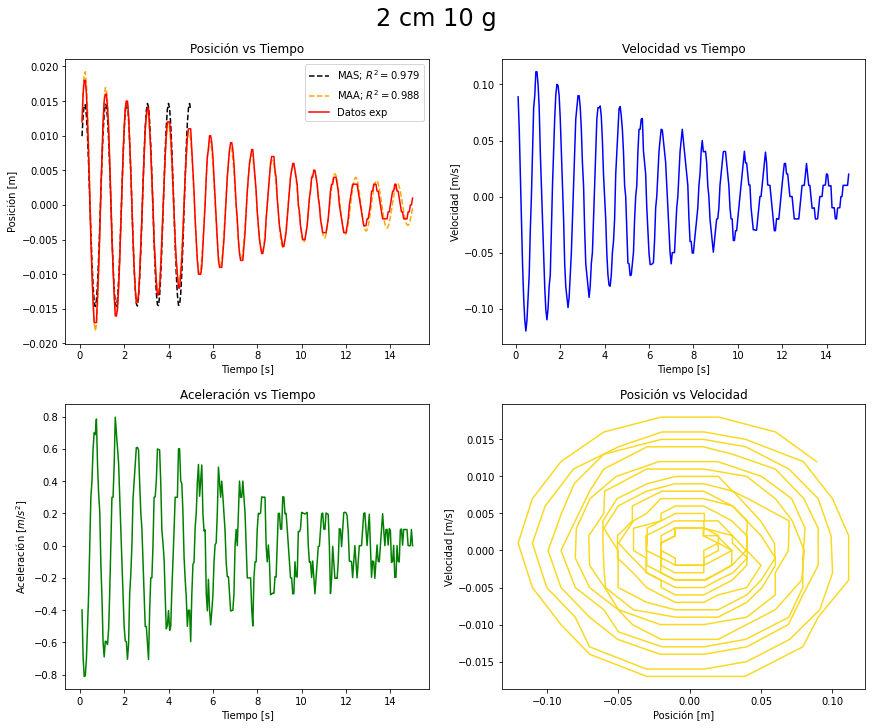

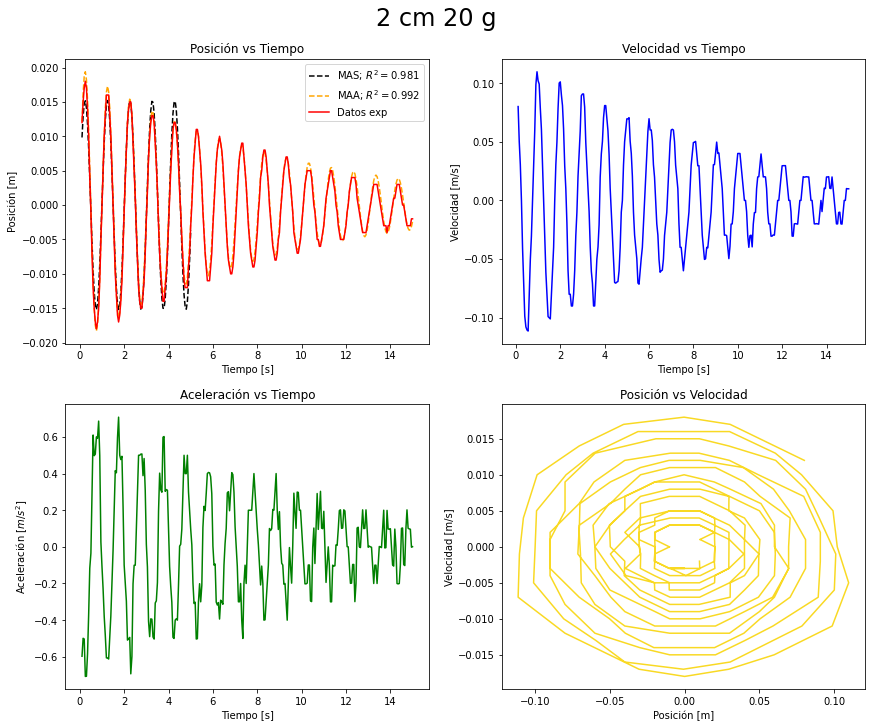

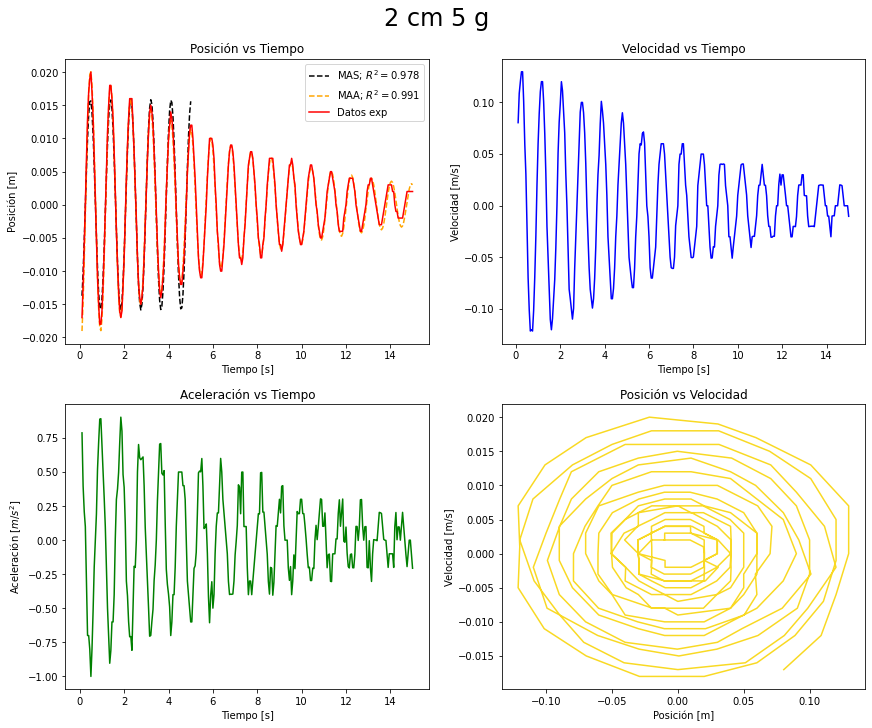

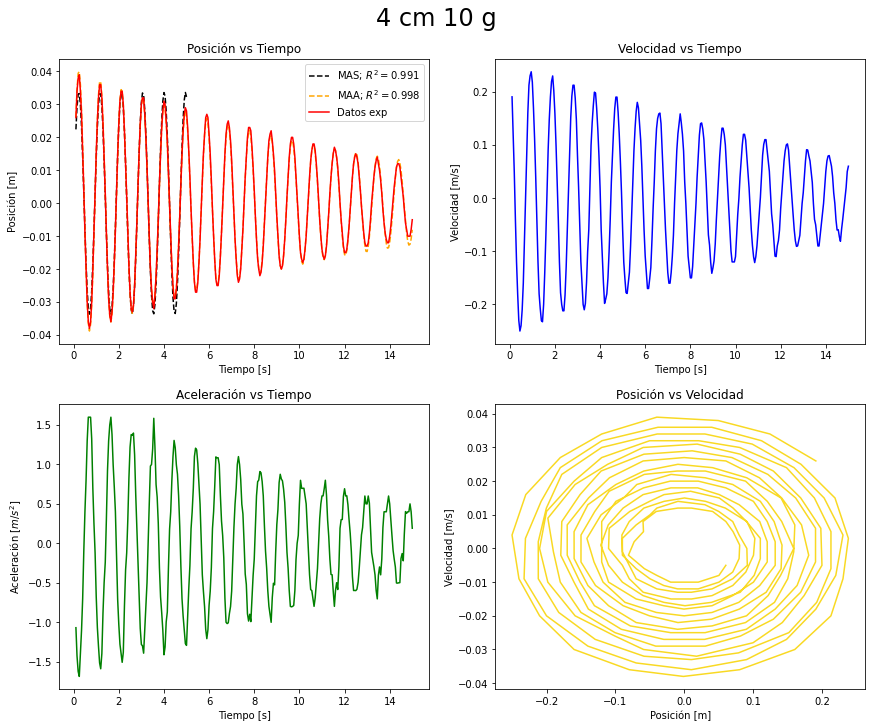

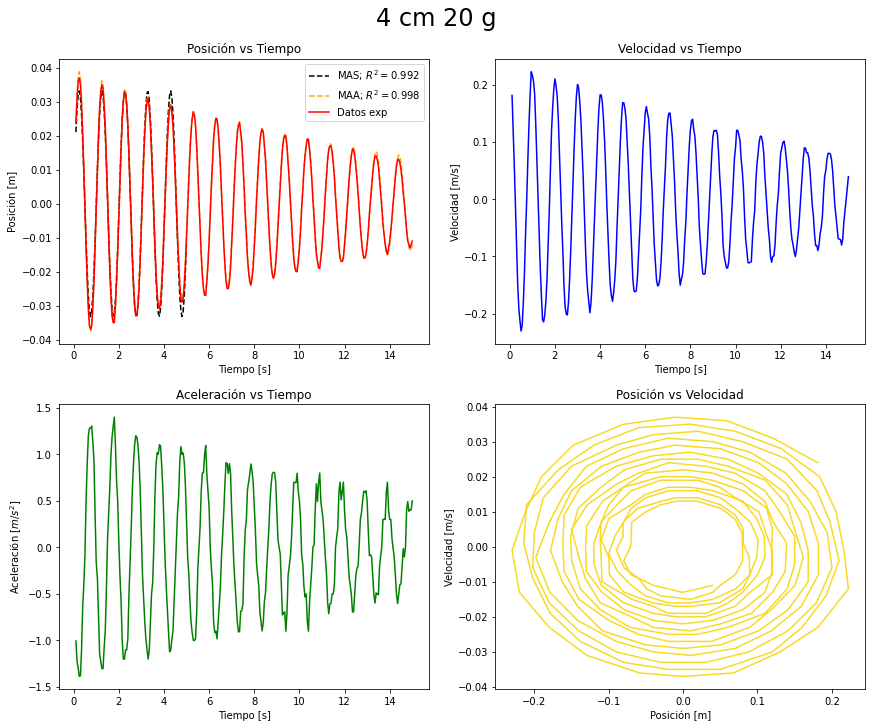

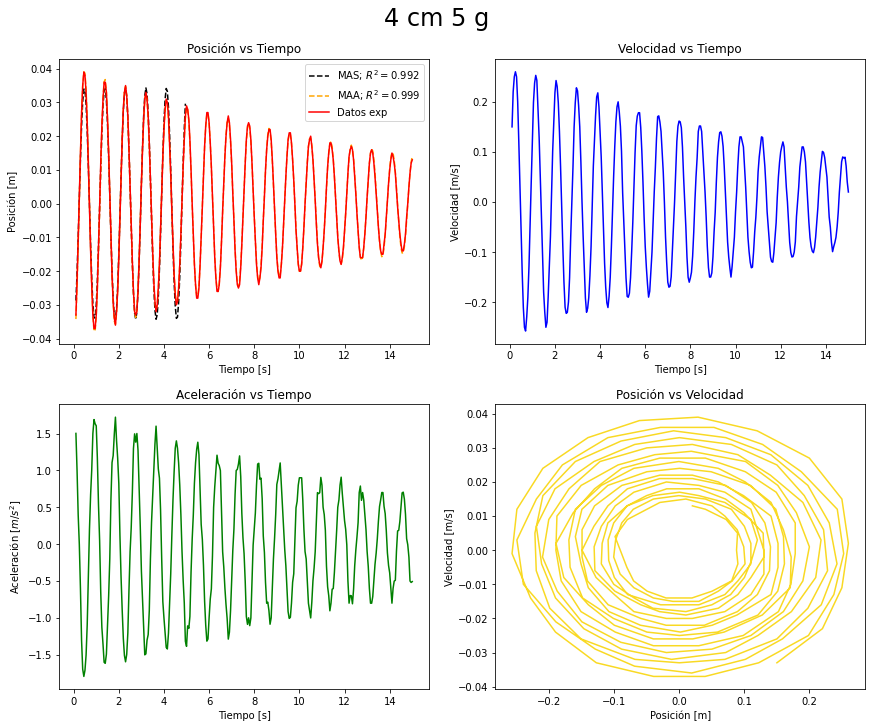

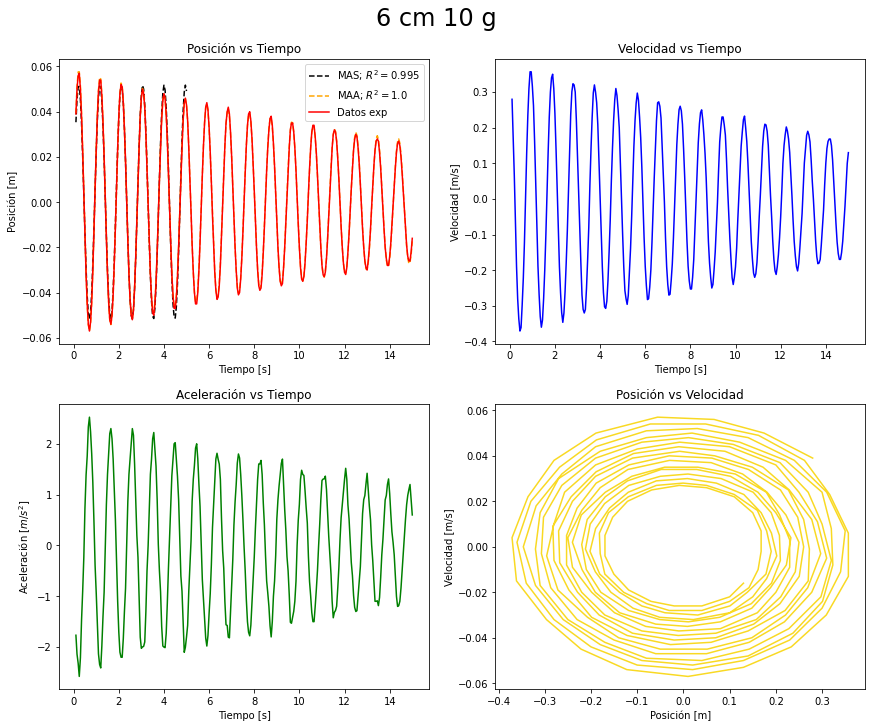

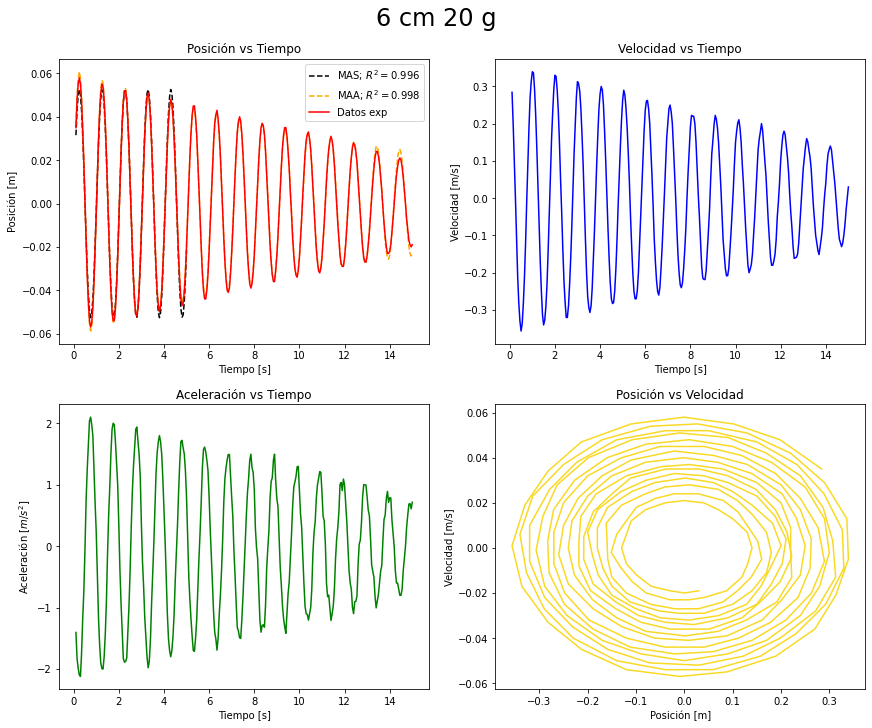

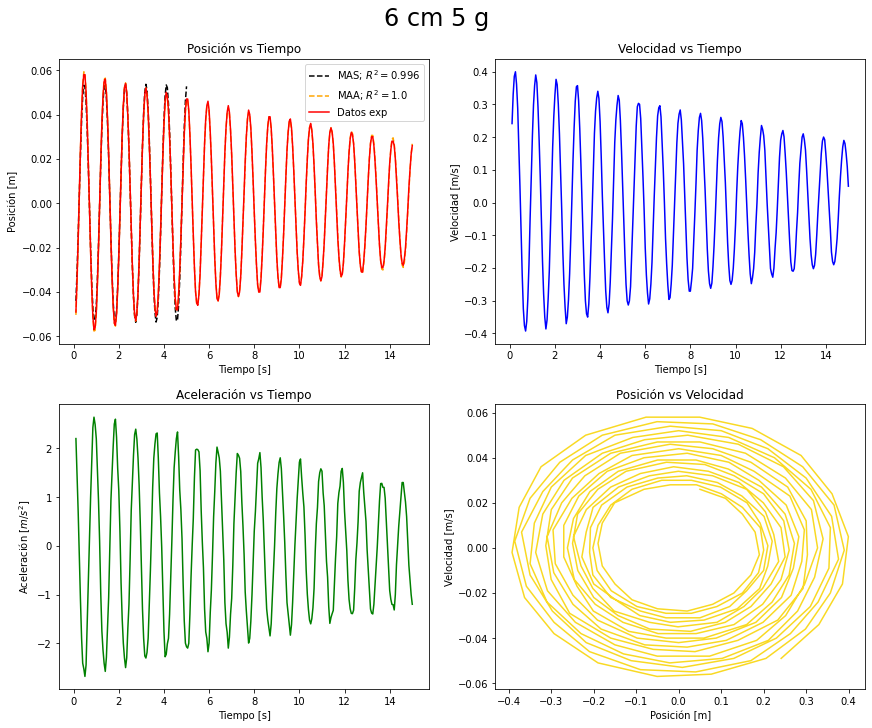

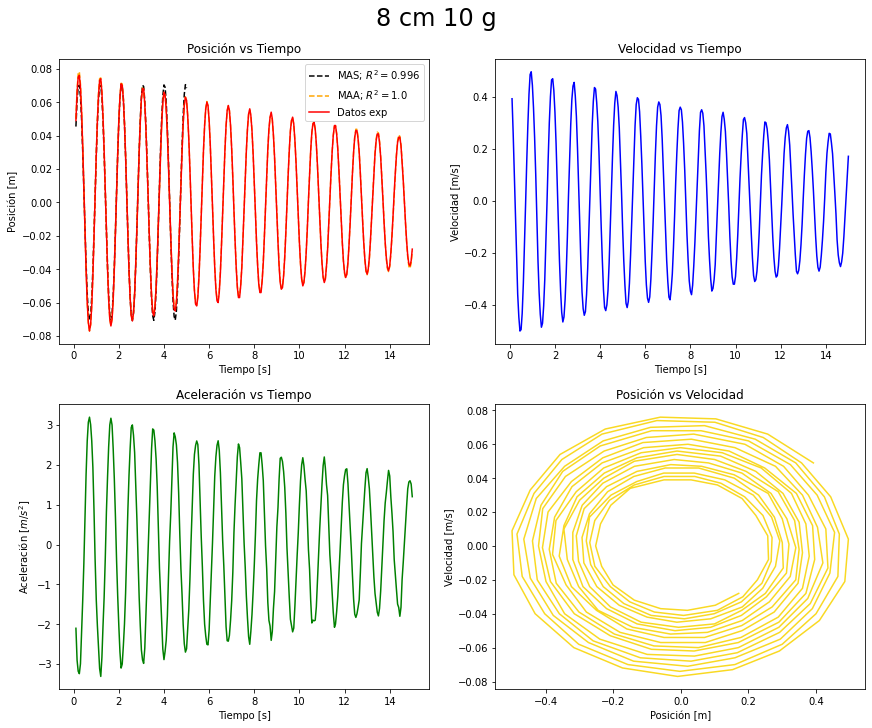

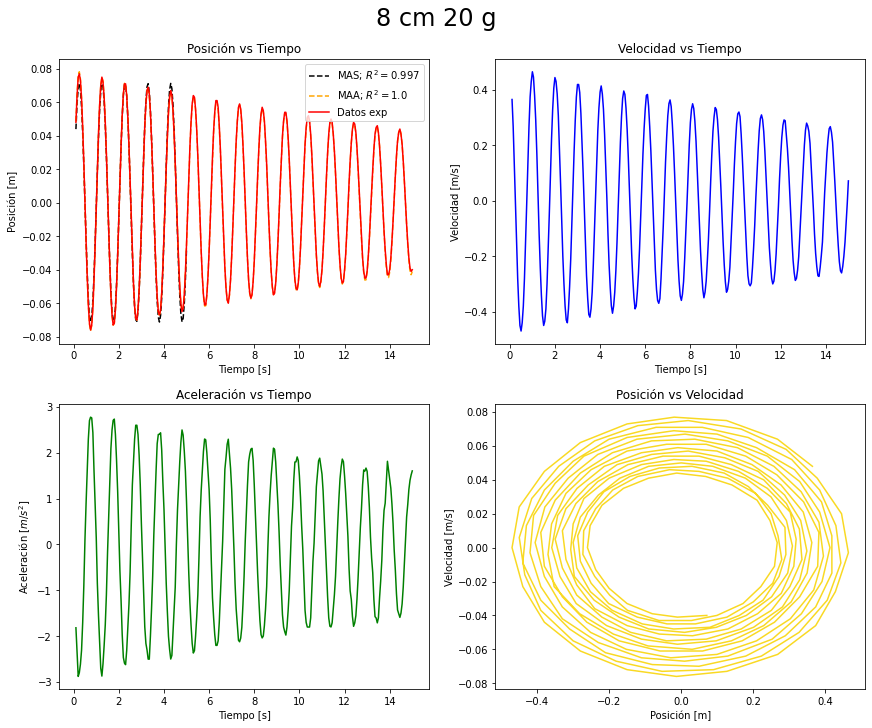

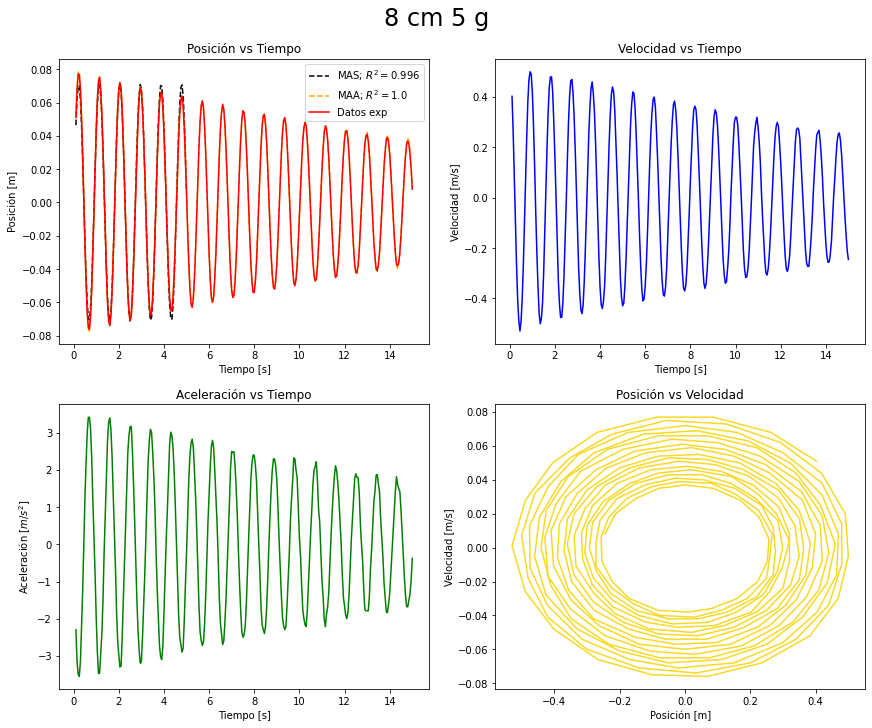

In [297]:
masas = [5.165,9.872,20.031]
T_MAS_2cm, T0_MAA_2cm, T_MAS_4cm, T0_MAA_4cm, T_MAS_6cm, T0_MAA_6cm, T_MAS_8cm, T0_MAA_8cm = [],[],[],[],[],[],[],[]
for idx,f in enumerate(files):
  if (idx+1) % 3 == 0: masa=masas[1]
  elif (idx+1) % 3 == 1: masa=masas[2]
  else: masa=masas[0]
  print(f)
  name = f.split(".")[0]
  MAS,MAA,T_MAS,T0_MAA = fits('datos_laboratorio/'+f,masa+m_soporte,name)
  if idx< 3: T_MAS_2cm.append(T_MAS), T0_MAA_2cm.append(T0_MAA)
  elif idx< 6: T_MAS_4cm.append(T_MAS), T0_MAA_4cm.append(T0_MAA)
  elif idx< 9: T_MAS_6cm.append(T_MAS), T0_MAA_6cm.append(T0_MAA)
  else: T_MAS_8cm.append(T_MAS), T0_MAA_8cm.append(T0_MAA)

T_MAS_2cm.sort(), T0_MAA_2cm.sort(), T_MAS_4cm.sort(), T0_MAA_4cm.sort()
T_MAS_6cm.sort(), T0_MAA_6cm.sort(), T_MAS_8cm.sort(), T0_MAA_8cm.sort()

In [303]:
T_MAS_2cm = np.array(T_MAS_2cm)
T_MAS_4cm = np.array(T_MAS_4cm)
T_MAS_6cm = np.array(T_MAS_6cm)
T_MAS_8cm = np.array(T_MAS_8cm)
T0_MAA_2cm = np.array(T0_MAA_2cm)
T0_MAA_4cm = np.array(T0_MAA_4cm)
T0_MAA_6cm = np.array(T0_MAA_6cm)
T0_MAA_8cm = np.array(T0_MAA_8cm)

Masas considerando la masa del soporte.

In [347]:
mt=np.array([(x+m_soporte)/1000 for x in masas])

Descargar las imágenes como zip

In [488]:
from google.colab import files
!zip -r imgs.zip *g.png
files.download('imgs.zip')

  adding: 2 cm 10 g.png (deflated 2%)
  adding: 2 cm 20 g.png (deflated 2%)
  adding: 2 cm 5 g.png (deflated 2%)
  adding: 4 cm 10 g.png (deflated 2%)
  adding: 4 cm 20 g.png (deflated 2%)
  adding: 4 cm 5 g.png (deflated 2%)
  adding: 6 cm 10 g.png (deflated 2%)
  adding: 6 cm 20 g.png (deflated 2%)
  adding: 6 cm 5 g.png (deflated 2%)
  adding: 8 cm 10 g.png (deflated 2%)
  adding: 8 cm 20 g.png (deflated 2%)
  adding: 8 cm 5 g.png (deflated 2%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Realizar gráfica m vs T^2

In [482]:
def linear_k2(m, k, b):
    return 4*(pi**2)*(1/k)*m + b

params_MAS_2cm, cov = curve_fit(linear_k2, mt, T_MAS_2cm**2)
params_MAS_4cm, cov = curve_fit(linear_k2, mt, T_MAS_4cm**2)
params_MAS_6cm, cov = curve_fit(linear_k2, mt, T_MAS_6cm**2)
params_MAS_8cm, cov = curve_fit(linear_k2, mt, T_MAS_8cm**2)

params_MAA_2cm, cov = curve_fit(linear_k2, mt, T0_MAA_2cm**2)
params_MAA_4cm, cov = curve_fit(linear_k2, mt, T0_MAA_4cm**2)
params_MAA_6cm, cov = curve_fit(linear_k2, mt, T0_MAA_6cm**2)
params_MAA_8cm, cov = curve_fit(linear_k2, mt, T0_MAA_8cm**2)

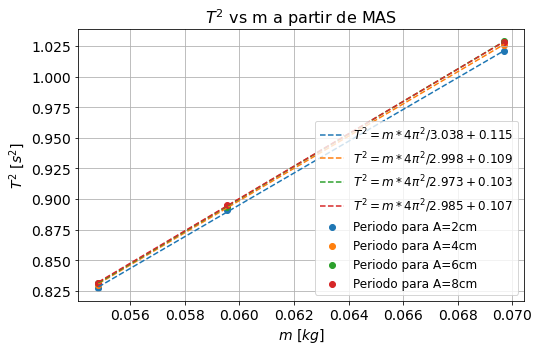

In [483]:
#Tamaño de la figura
plt.figure(figsize=(8, 5)) 

#Se grafica la funcion lineal y los puntos de datos experimentales
plt.plot(mt, linear_k2(mt, *params_MAS_2cm), linestyle='--', label='$T^2 = m* 4 \pi^2 / %.3f +%.3f$'%(params_MAS_2cm[0],params_MAS_2cm[1]))
plt.scatter(mt, T_MAS_2cm**2, label='Periodo para A=2cm')
plt.plot(mt, linear_k2(mt, *params_MAS_4cm), linestyle='--', label='$T^2 = m* 4 \pi^2 / %.3f +%.3f$'%(params_MAS_4cm[0],params_MAS_4cm[1]))
plt.scatter(mt, T_MAS_4cm**2, label='Periodo para A=4cm')
plt.plot(mt, linear_k2(mt, *params_MAS_6cm), linestyle='--', label='$T^2 = m* 4 \pi^2 / %.3f +%.3f$'%(params_MAS_6cm[0],params_MAS_6cm[1]))
plt.scatter(mt, T_MAS_6cm**2, label='Periodo para A=6cm')
plt.plot(mt, linear_k2(mt, *params_MAS_8cm), linestyle='--', label='$T^2 = m* 4 \pi^2 / %.3f +%.3f$'%(params_MAS_8cm[0],params_MAS_8cm[1]))
plt.scatter(mt, T_MAS_8cm**2, label='Periodo para A=8cm')
plt.legend()

#Definir título y ajustar el tamaño y pocisión de la leyenda y los ejes
plt.title('$T^2$ vs m a partir de MAS', fontsize = 16)
plt.legend(fontsize = 12)

plt.ylabel('$T^2$ [$s^2$]', fontsize = 14)
plt.xlabel('$m$ [$kg$]', fontsize = 14)
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos

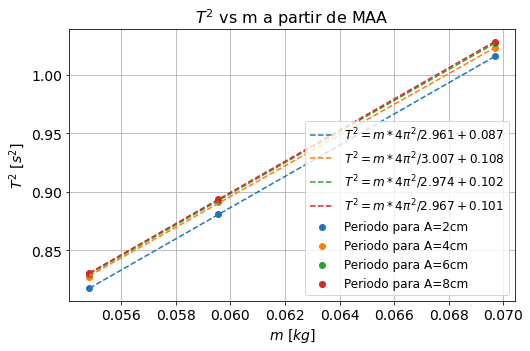

In [484]:
#Tamaño de la figura
plt.figure(figsize=(8, 5)) 

#Se grafica la funcion lineal y los puntos de datos experimentales
plt.plot(mt, linear_k2(mt, *params_MAA_2cm), linestyle='--', label='$T^2 = m* 4 \pi^2 / %.3f +%.3f$'%(params_MAA_2cm[0],params_MAA_2cm[1]))
plt.scatter(mt, T0_MAA_2cm**2, label='Periodo para A=2cm')
plt.plot(mt, linear_k2(mt, *params_MAA_4cm), linestyle='--', label='$T^2 = m* 4 \pi^2 / %.3f +%.3f$'%(params_MAA_4cm[0],params_MAA_4cm[1]))
plt.scatter(mt, T0_MAA_4cm**2, label='Periodo para A=4cm')
plt.plot(mt, linear_k2(mt, *params_MAA_6cm), linestyle='--', label='$T^2 = m* 4 \pi^2 / %.3f +%.3f$'%(params_MAA_6cm[0],params_MAA_6cm[1]))
plt.scatter(mt, T0_MAA_6cm**2, label='Periodo para A=6cm')
plt.plot(mt, linear_k2(mt, *params_MAA_8cm), linestyle='--', label='$T^2 = m* 4 \pi^2 / %.3f +%.3f$'%(params_MAA_8cm[0],params_MAA_8cm[1]))
plt.scatter(mt, T0_MAA_8cm**2, label='Periodo para A=8cm')
plt.legend()

#Definir título y ajustar el tamaño y pocisión de la leyenda y los ejes
plt.title('$T^2$ vs m a partir de MAA', fontsize = 16)
plt.legend(fontsize = 12)

plt.ylabel('$T^2$ [$s^2$]', fontsize = 14)
plt.xlabel('$m$ [$kg$]', fontsize = 14)
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos

## Visualización de fasores para posición, velocidad y aceleración para evidenciar el desfase entre estos

In [374]:
#Definir funciones para posición, velocidad y aceleración
def P_MAS(t, a, w, phi):
    return a*np.cos((w*t)+phi)
def V_MAS(t, a, w, phi):
    return -w*a*np.sin((w*t)+phi)
def A_MAS(t, a, w, phi):
    return -w**2*a*np.cos((w*t)+phi)

Se escoge la prueba con mayor amplitud inicial y mayor peso debido a que era la que mejor se ajustaba con un MAS.

In [479]:
f = 'datos_laboratorio/8 cm 20 g.txt'
masa = mt[2]
df = pd.read_csv(f, skiprows=4, sep='\t', decimal=",")
df = df.dropna()
df.columns = ['Tiempo', 'Recorrido', 'Fuente', 'Velocidad', 'Aceleracion']
#Separar cada columna para mejor manejo
t = df['Tiempo']
t = t[t<15]
r = df['Recorrido'][:len(t)]
v = df['Velocidad'][:len(t)]
a = df['Aceleracion'][:len(t)]
#Para el ajuste a un MAS, se selecciona hasta 10 segundos
t_MAS = t[t<5]
n = len(t_MAS)
w_guess = np.sqrt(k/masa)
params_P_MAS, cov_P_MAS = curve_fit(P_MAS, t_MAS, r[:n], p0=[r.max(),w_guess,0])  
params_V_MAS, cov_V_MAS = curve_fit(V_MAS, t_MAS, v[:n], p0=[v.max(),w_guess,pi/2])  
params_A_MAS, cov_A_MAS = curve_fit(A_MAS, t_MAS, a[:n], p0=[a.max(),w_guess,pi])  


Se grafican los fasores, sin embargo, no se considera la amplitud real de cada uno debido a que por las diferencias de tamaños no sería perceptible al graficarlos. Por lo tanto, todos se grafican como si fueran unitarios

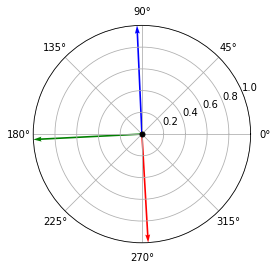

In [477]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(0, 0, color='black', marker='o', markersize=5)
ax.quiver(0,0,params_P_MAS[2],1, color="b", angles="xy", scale_units='xy', scale=1.)
ax.quiver(0,0,params_V_MAS[2]+pi/2,1, color="g",angles="xy", scale_units='xy', scale=1.)
ax.quiver(0,0,params_A_MAS[2],1, color="r",angles="xy", scale_units='xy', scale=1.)

ax.set_rmin(0)
ax.set_rmax(1)

plt.show()

Desfase entre la posición y la velocidad. Se le agrega $\pi/2$ debido a que la velocidad está en términos del seno, y se sabe que el desfase entre seno y coseno es de $\pi/2$.

In [464]:
(params_V_MAS[2]+pi/2)-params_P_MAS[2]

1.5755952140313336

In [465]:
pi/2

1.5707963267948966

Desfase entre la posición y la aceleración.

In [466]:
params_A_MAS[2]-params_P_MAS[2]

3.1538697820659216

Comparación de posición, velocidad y aceleración a través del tiempo

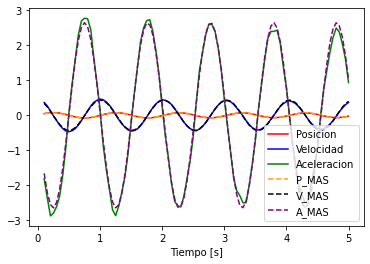

In [478]:
plt.plot(t_MAS, r[:n], color='r', label='Posicion')
plt.plot(t_MAS, v[:n], color='b', label='Velocidad')
plt.plot(t_MAS, a[:n], color='g', label='Aceleracion')
plt.plot(t_MAS, P_MAS(t_MAS,*params_P_MAS),color='orange',linestyle='--', label='P_MAS')
plt.plot(t_MAS, V_MAS(t_MAS,*params_V_MAS),color='black',linestyle='--', label='V_MAS')
plt.plot(t_MAS, A_MAS(t_MAS,*params_A_MAS),color='purple',linestyle='--', label='A_MAS')

plt.xlabel('Tiempo [s]')
plt.legend()